In [1]:
import pandas as pd
from pathlib import Path
from bs4 import BeautifulSoup
from tqdm import tqdm

from scraper import load_from_file

path = Path.cwd() / "table.csv"
data = pd.read_csv(path).dropna()

text = []
print("Loading text from chapters...")
for chapter in tqdm(data["out"].values):
    with open(chapter, "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file.read(), "html.parser")
    text.append(soup.find(class_="content").get_text())

Loading text from chapters...


100%|██████████| 837/837 [00:20<00:00, 40.48it/s]


Counting mentions...
Group 1:
Erin
Ryoka
Tom
Geneva


Group 2:
Pisces
Ceria
Ksmvr
Yvlon




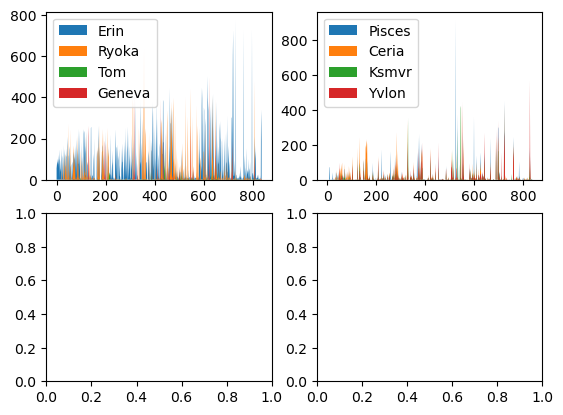

In [41]:
from matplotlib import pyplot as plt
import numpy as np

counts = data[["title"]]

fig, axs = plt.subplots(2, 2)
axs = axs.flatten()

groups = [
    ["Erin", "Ryoka", "Tom", "Geneva"],
    ["Pisces", "Ceria", "Ksmvr", "Yvlon"]
]

print("Counting mentions...")
for i, group in enumerate(groups):
    print(f"Group {i+1}:")
    for character in group:
        print(character)
        col = pd.Series([chapter.count(character) for chapter in text], name=character)
        counts = counts.join(col)
        axs[i].stackplot(counts.index, counts[character])
    axs[i].legend(group)
    print("\n")

plt.show()